In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Inspect Data

In [4]:
all_data = pd.read_csv('all_data.csv')
sd_data = pd.read_csv('sandiego_listings.csv')
# data.describe().round(3)

C:\Users\sangd\AppData\Local\Temp\ipykernel_16496\800789165.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('all_data.csv')


In [26]:
sd_data.describe().round(3)

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.123000e+04,1.123000e+04,0.0,11230.000,11230.000,11230.000,11230.000,11230.000,11230.000,11230.000,11230.000,11230.000
mean,4.300150e+17,1.672740e+08,NaN,32.770,-117.185,301.299,10.827,66.032,1.683,14.175,207.097,16.236
std,4.426163e+17,1.739769e+08,NaN,0.064,0.066,461.832,17.362,105.969,1.973,25.961,110.729,22.694
min,6.000000e+00,2.900000e+01,NaN,32.541,-117.282,10.000,1.000,0.000,0.000,1.000,0.000,0.000
25%,3.349969e+07,2.527107e+07,NaN,32.729,-117.250,120.000,2.000,3.000,0.240,1.000,104.000,1.000
50%,5.477823e+17,8.816891e+07,NaN,32.762,-117.179,189.000,3.000,22.000,1.100,3.000,221.000,8.000
75%,8.717301e+17,3.135463e+08,NaN,32.798,-117.142,335.000,30.000,82.000,2.650,14.000,308.000,26.000
max,1.119001e+18,5.670964e+08,NaN,33.102,-116.937,10000.000,365.000,1049.000,55.330,156.000,365.000,687.000


In [4]:
# total_nan = data.isnull().sum()
# print('total nan value:', total_nan)

total nan value: id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               11496
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               266
minimum_nights                        0
number_of_reviews                     0
last_review                        1672
reviews_per_month                  1672
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                            2448
dtype: int64


we're not gonna use name or neighborhood columns. I think we should drop observations that NaN for `price` column. For last_review and reviews_per_month, probably these listings are too new and never been rent, so we can set these to 0

In [5]:
# Remove rows with NaN in 'price' column
all_data = all_data.dropna(subset=['price'])
sd_data = sd_data.dropna(subset=['price'])
# Set NaN values in 'last_review' and 'reviews_per_month' to 0
all_data.fillna({'last_review': 0, 'reviews_per_month':0}, inplace=True)
sd_data.fillna({'last_review': 0, 'reviews_per_month':0}, inplace=True)
# total_nan = data.isnull().sum()
# print('total nan value:', total_nan)

In [6]:
for c in all_data.columns:
    print(f"Column: {c:<20} | # unique values: {np.ma.count(all_data[c].unique()):<9} | dtype: {type(all_data[c][1000])}")

Column: id                   | # unique values: 234922    | dtype: <class 'numpy.int64'>
Column: name                 | # unique values: 212678    | dtype: <class 'str'>
Column: host_id              | # unique values: 104510    | dtype: <class 'numpy.int64'>
Column: host_name            | # unique values: 27797     | dtype: <class 'str'>
Column: neighbourhood_group  | # unique values: 35        | dtype: <class 'float'>
Column: neighbourhood        | # unique values: 1468      | dtype: <class 'str'>
Column: latitude             | # unique values: 186298    | dtype: <class 'numpy.float64'>
Column: longitude            | # unique values: 187711    | dtype: <class 'numpy.float64'>
Column: room_type            | # unique values: 4         | dtype: <class 'str'>
Column: price                | # unique values: 2544      | dtype: <class 'numpy.float64'>
Column: minimum_nights       | # unique values: 148       | dtype: <class 'numpy.int64'>
Column: number_of_reviews    | # unique values: 957  

## dropping columns that I think not neccessary for now
please read README.md and consider `city` and `last_review`

In [7]:
all_data2 = all_data.drop(columns=['id','name','host_id','host_name','neighbourhood_group', 'neighbourhood','license', 'city', 'last_review'])
sd_data2 = sd_data.drop(columns=['id','name','host_id','host_name','neighbourhood_group', 'neighbourhood','license', 'last_review'])
# print(data2.columns)
# data2.describe()

# Convert room_type into integer values

In [8]:
def convert_room_type(df):
    print(df['room_type'].unique())
    room_type_dict = {'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3} # might be changed later
    df['room_type'] = df['room_type'] .replace(room_type_dict)
    print(df['room_type'].unique())

convert_room_type(all_data2)
convert_room_type(sd_data2)


['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
[0 1 2 3]
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
[1 0 2 3]


C:\Users\sangd\AppData\Local\Temp\ipykernel_16496\1976486340.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['room_type'] = df['room_type'] .replace(room_type_dict)


In [9]:
# sns.heatmap(data2.corr(), annot=True)
# plt.show()

It makes sense that `longtitude` and `lattitude` are quite correlated, the number would increase if we only do either east coast or west coast cities. We're doing the ~35 cities in the USA tho. It also expected that `number_of_reviews`, `reviews_per_month`, and `number_of_reviews_ltm` are closely correlated.

# Consider:
Normalize standardize data so the correlation is more obvious

In [10]:
# sns.pairplot(data2)

Consider: remove the outliners and abnomalities so the plots are not so squeezed. Someone in group can analyze original data, while other can analyze the data without outliners

In [11]:
# https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns, th1=0.01, th3=0.90, multiplier=1.5):
    for column in columns:
        Q1 = df[column].quantile(th1)
        Q3 = df[column].quantile(th3)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        print(f"column: {column}, lower_bound: {lower_bound}, upper_bound: {upper_bound}")
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df
# consider: Removing Outliers using Standard Deviation (probably not good because data is not normally distributed)
# data2 columns: 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm'
all_data3 = remove_outliers_iqr(all_data2, ['price', 'number_of_reviews_ltm', 'minimum_nights', 'calculated_host_listings_count'],th1=0.1, th3=0.90, multiplier=1)
sd_data3 = remove_outliers_iqr(sd_data2, ['price', 'number_of_reviews_ltm', 'minimum_nights', 'calculated_host_listings_count'],th1=0.1, th3=0.90, multiplier=1)

column: price, lower_bound: -352.0, upper_bound: 899.0
column: number_of_reviews_ltm, lower_bound: -37.0, upper_bound: 74.0
column: minimum_nights, lower_bound: -28.0, upper_bound: 59.0
column: calculated_host_listings_count, lower_bound: -75.0, upper_bound: 153.0
column: price, lower_bound: -415.0, upper_bound: 1085.0
column: number_of_reviews_ltm, lower_bound: -44.0, upper_bound: 88.0
column: minimum_nights, lower_bound: -29.0, upper_bound: 61.0
column: calculated_host_listings_count, lower_bound: -41.0, upper_bound: 85.0


In [12]:
# sns.pairplot(test_df)

In [13]:
# test_df.hist(bins=30, figsize=(15,10))
# plt.tight_layout()
# plt.show()

In [14]:
# test_df.to_csv('cleaned_data.csv', index=False)

## Explore for Unsupervised Learning

What are we looking for? Ideas:
  1. There are lots of information in `name` (for examples, number of beds, baths, distance to attraction, pets allow...). We can create a tokens/keywords list, use cluster to see how keywords are related in term of pricing, room type, locations, ...
  2. create new column `income` which is calculated by `price` and `reviews_per_month`. Then assign each observation into groups, maybe 4 groups: `low_income` if `income<=500`> , `medium_income` if `income<=2000`>, `high_income`, `super_high_income`. Again, run PCA and clustering to see if there's an underline pattern that put an observation into its income group. 
For now, we perfom PCA on the dataset with sklearn. With further thinking, we may drop or re-add columns, and we'll decide and apply clustering on chosen idea.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)

def pca_2dplot(pca, df, scores):
    # biplot. source: Introduction to Statistical Learning https://github.com/intro-stat-learning/ISLP_labs
    i, j = 0, 1 # which components
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    point_size = 0.2  # Adjust this value to make the points smaller or larger
    vector_scale = 5

    ax.scatter(scores[:,0], scores[:,1], s=point_size)
    ax.set_xlabel('PC%d' % (i+1))
    ax.set_ylabel('PC%d' % (j+1))
    for k in range(pca.components_.shape[1]):
        ax.arrow(0, 0, pca.components_[i,k]*vector_scale, pca.components_[j,k]*vector_scale)
        # print(data2.columns[k], f'(i,k)={i},{k}, (j,k)={j},{k}',  pca.components_[i,k], pca.components_[j,k])
        ax.text(pca.components_[i,k]*vector_scale,
                pca.components_[j,k]*vector_scale,
                df.columns[k])
    plt.show()

def pca_3dplot(pca,df,scores):
    i, j, k = 0, 1, 2  # which components for 3D plot

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Set the size of the points
    point_size = 0.1  # Adjust this value to make the points smaller or larger
    vector_scale = 0.12


    # 3D scatter plot with adjusted point size
    # ax.scatter(scores[:, i], scores[:, j], scores[:, k], s=point_size)

    ax.set_xlabel('PC%d' % (i + 1))
    ax.set_ylabel('PC%d' % (j + 1))
    ax.set_zlabel('PC%d' % (k + 1))

    for l in range(pca.components_.shape[1]):
        ax.quiver(0, 0, 0, pca.components_[i, l], pca.components_[j, l], pca.components_[k, l], length=0.1, color='r')
        # print(data2.columns[l], f'(i,l)={i},{l}, (j,l)={j},{l}, (k,l)={k},{l}',  pca.components_[i, l], pca.components_[j, l], pca.components_[k, l])
        ax.text(pca.components_[i, l]*vector_scale, pca.components_[j, l]*vector_scale, pca.components_[k, l]*vector_scale, df.columns[l])

    plt.show()

def pca_function(df):

    print(f"df means:\n{df.mean()}\n\ndf variance:\n{df.var()}")

    # scaler
    scaler = StandardScaler(with_std=True, with_mean=True)
    scaled_data = scaler.fit_transform(df)

    # check for NaN value
    has_nan = np.isnan(scaled_data).sum()
    print(f"Array has NaN values: {has_nan}")
    nan_indices = np.argwhere(np.isnan(scaled_data))
    print("Indices of NaN values:")
    print(nan_indices)

    # PCA
    pca = PCA()
    pca.fit(scaled_data)
    print('PCA means: ', pca.mean_)  # means should be 0 after scaler()?

    scores = pca.transform(scaled_data)
    print('PCA components_: ', pca.components_.shape)

    pca_2dplot(pca,df, scores)
    pca_3dplot(pca, df, scores)

df means:
latitude                           34.637519
longitude                        -105.851223
room_type                           0.240817
price                             199.814705
minimum_nights                     10.736935
number_of_reviews                  47.006688
reviews_per_month                   1.351293
calculated_host_listings_count     13.471694
availability_365                  206.814773
number_of_reviews_ltm              11.898145
dtype: float64

df variance:
latitude                             47.564738
longitude                           634.634844
room_type                             0.212173
price                             23648.034287
minimum_nights                      167.917392
number_of_reviews                  6496.424446
reviews_per_month                     2.316325
calculated_host_listings_count      620.509116
availability_365                  13686.075649
number_of_reviews_ltm               248.816353
dtype: float64
Array has NaN values: 0
In

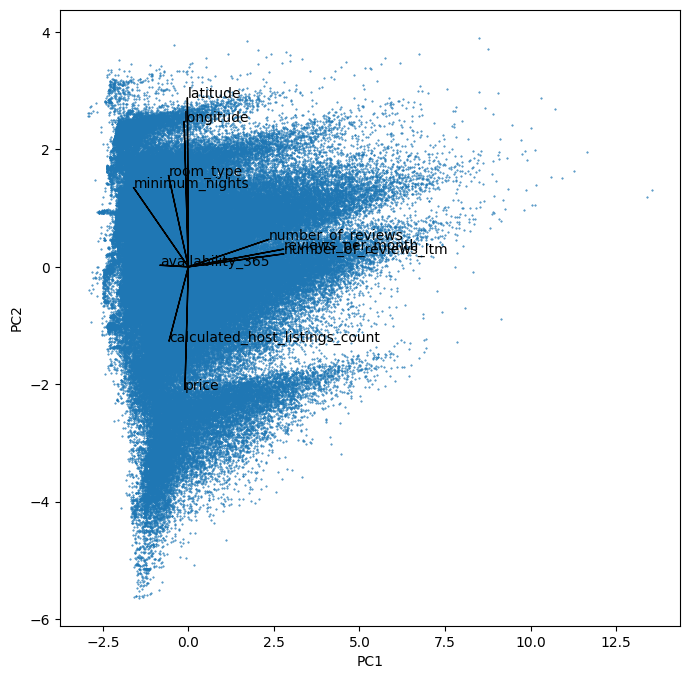

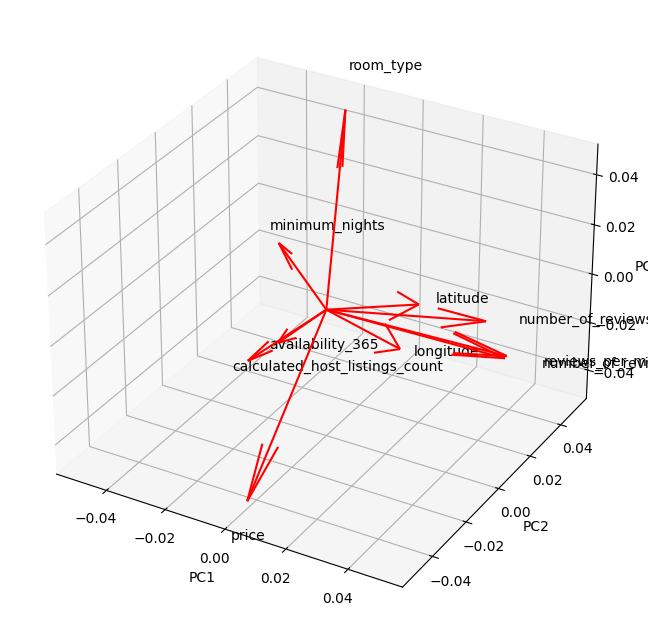

df means:
latitude                           32.768702
longitude                        -117.182510
room_type                           0.154407
price                             245.394112
minimum_nights                     10.299725
number_of_reviews                  66.250308
reviews_per_month                   1.683211
calculated_host_listings_count     11.377544
availability_365                  204.747420
number_of_reviews_ltm              16.003976
dtype: float64

df variance:
latitude                              0.004213
longitude                             0.004380
room_type                             0.146105
price                             35807.707093
minimum_nights                      170.162381
number_of_reviews                 10479.865384
reviews_per_month                     2.810569
calculated_host_listings_count      338.857826
availability_365                  12362.635497
number_of_reviews_ltm               334.419223
dtype: float64
Array has NaN values: 0
In

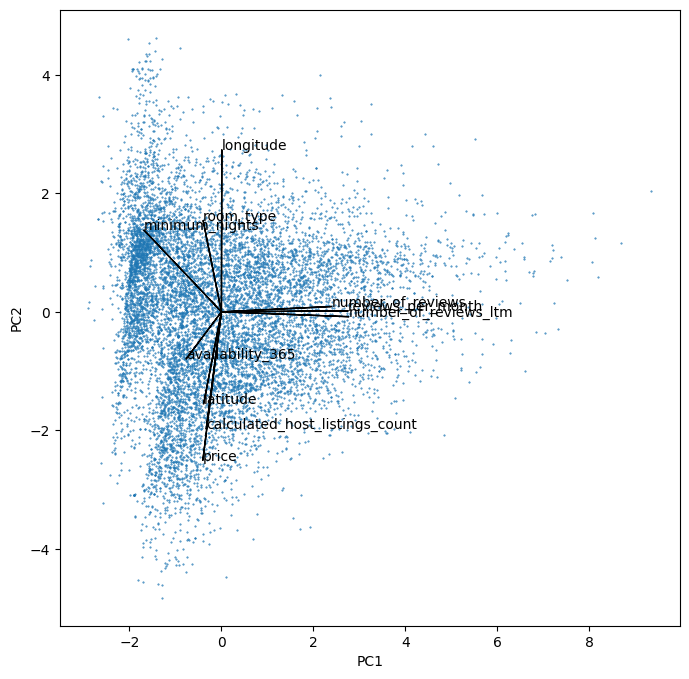

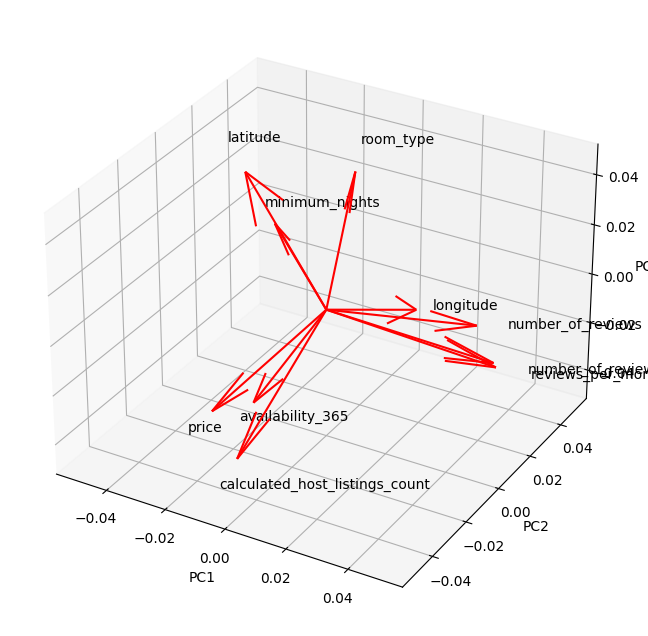

In [18]:
pca_function(all_data3)
pca_function(sd_data3)

Text(0, 0.5, 'Proportion of Variance Explained')

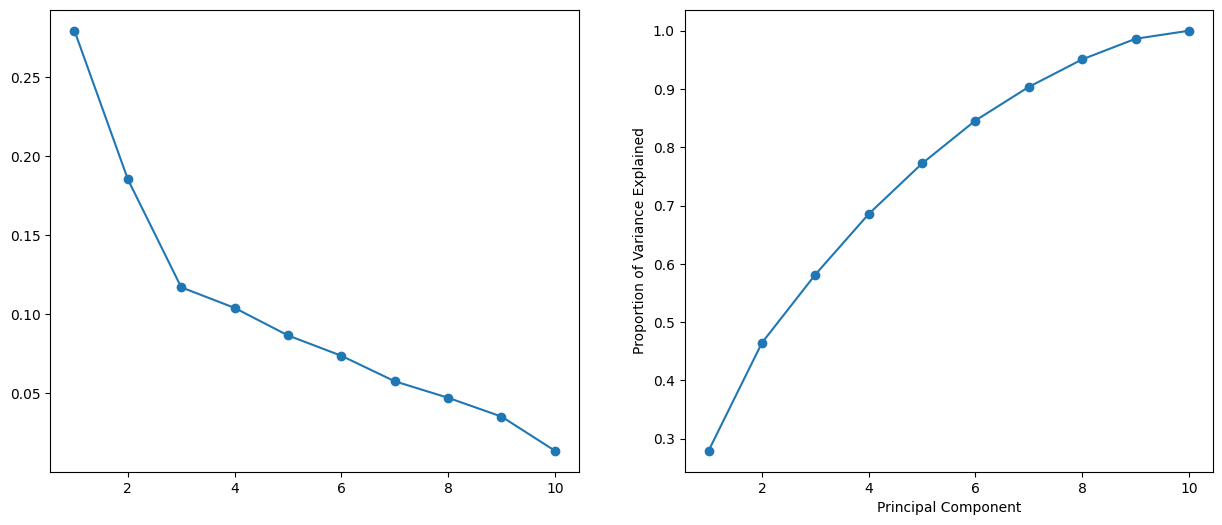

In [19]:
    # scaler
scaler = StandardScaler(with_std=True, with_mean=True)
scaled_data = scaler.fit_transform(sd_data3)

# PCA
pca = PCA()
pca.fit(scaled_data)
# print('PCA means: ', pca.mean_)  # means should be 0 after scaler()?

scores = pca.transform(scaled_data)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pca.explained_variance_ratio_,
        marker='o')

ax = axes[1]
ax.plot(ticks,
        pca.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')


### Features and their effects on pc1 and pc2
From the plot, we can feature `price` is along PC2. It has positive correlation with `calculated_host_listings_count`. `room_type`, `longtitude` seem to be negatively correlated with `price`. The values of `room_type` used to be discrete (['Entire home/apt' 'Private room' 'Shared room' 'Hotel room'] =[0 1 2 3]). after MinMax scaling, they became [0 0.333 0.666 1]. It makes senses that the lower the `room_type` value, the higher the `price`. It also makes sense that the lower the `longtitude`, the closer the listing get to the coast, hence the higher the `price`

The group of `reviews...` features are closely related to each other. They mainly perpendicular to PC1. We can say that they are not well correlated with features such as `price`.

In [29]:
def features_on_pca(df,pca, comp_n):
    print("PC ", comp_n)
    print(df.columns)
    print(pca.components_[comp_n])

    print("Og values:\n")
    for i, value in enumerate(sorted(zip(pca.components_[comp_n],df.columns))):
        print(i, value)

    print("Abs values:\n")
    for i, value in enumerate(sorted(zip(abs(pca.components_[comp_n]),df.columns))):
        print(i, value)

In [30]:
features_on_pca(sd_data3, pca, 0)
features_on_pca(sd_data3, pca, 1)

Index(['latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')
[-0.07750676  0.00163252 -0.07936951 -0.08090509 -0.33688789  0.47947427
  0.55113875 -0.06610311 -0.15341841  0.55325862]
Og values:

0 (-0.3368878876658672, 'minimum_nights')
1 (-0.1534184090713193, 'availability_365')
2 (-0.08090508541894986, 'price')
3 (-0.07936950977651362, 'room_type')
4 (-0.0775067646016126, 'latitude')
5 (-0.06610310782670864, 'calculated_host_listings_count')
6 (0.0016325222344433232, 'longitude')
7 (0.47947427406403703, 'number_of_reviews')
8 (0.5511387514554777, 'reviews_per_month')
9 (0.5532586226855404, 'number_of_reviews_ltm')
Abs values:

0 (0.0016325222344433232, 'longitude')
1 (0.06610310782670864, 'calculated_host_listings_count')
2 (0.0775067646016126, 'latitude')
3 (0.07936950977651362, 'room_type')
4 (0.080905085418

In [23]:
## K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=2, n_init=20).fit(scores)

In [24]:
kmeans.labels_

array([3, 0, 3, ..., 0, 0, 1])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

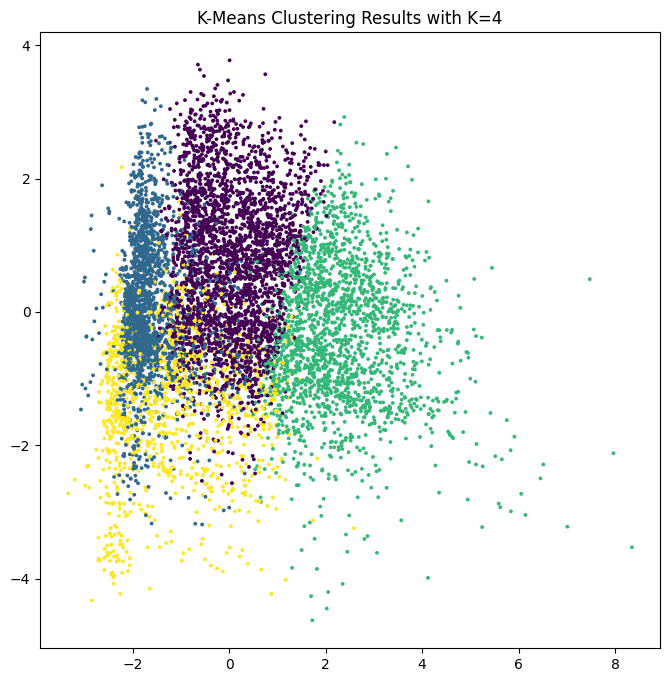

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1], c=kmeans.labels_, s=3)
ax.set_title("K-Means Clustering Results with K=4")

vector_scale=5
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i,k]*vector_scale, pca.components_[j,k]*vector_scale)
    # print(data2.columns[k], f'(i,k)={i},{k}, (j,k)={j},{k}',  pca.components_[i,k], pca.components_[j,k])
    ax.text(pca.components_[0,k]*vector_scale,
            pca.components_[1,k]*vector_scale,
            test_df.columns[k])

In [28]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(scaled_data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [30]:
from ISLP.cluster import compute_linkage
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)

In [ ]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [13.75, 13.75, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [130.0, 130.0, 161.25, 161.25],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [232.5, 232.5, 260.0, 260.0],
  [202.5, 202.5, 246.25, 246.25],
  [145.625, 145.625, 224.375, 224.375],
  [93.75, 93.75, 185.0, 185.0],
  [36.875, 36.875, 139.375, 139.375],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [282.5, 282.5, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [296.25, 2

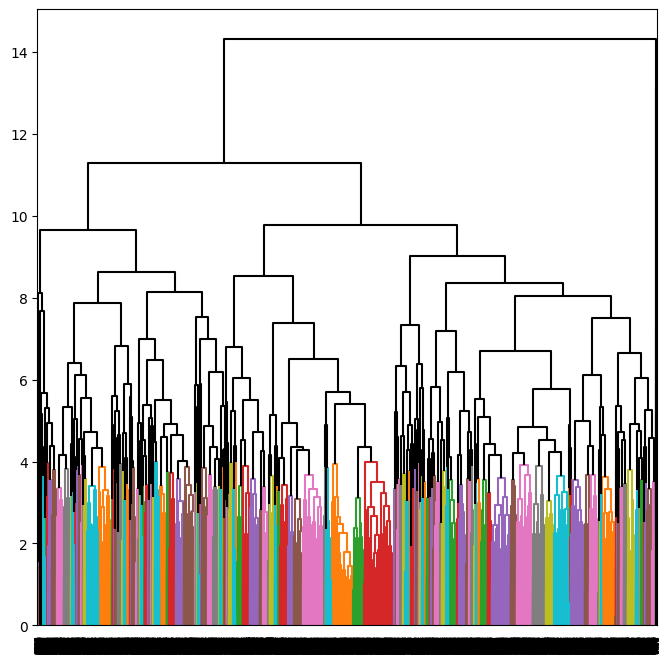

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black')